In [152]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [164]:
df=pd.read_csv("./datcw_na.csv")             # read csv 
df                                           # inspect dataframe

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.00,0.00,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.00,0.00,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.00,0.00,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.00,0.00,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.00,0.00,20.84
...,...,...,...,...,...,...,...,...,...,...
763,C3,0.52,948.64,277.83,218.30,4.24,4.95,0.48,4.05,17.88
764,C2,0.50,727.65,NaN,266.80,3.47,1.98,0.44,5.00,16.54
765,C1,0.68,889.35,404.25,178.60,3.47,2.43,0.40,4.95,16.44
766,C3,0.50,654.88,363.82,218.30,3.15,3.96,0.36,4.50,16.48


In [166]:
nan_rows = df[df.isnull().any(axis=1)]       # inspect incomplete rows
len(df)                                      # print original number of rows
df['X3'].mean()
nan_rows.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.00,0.00,15.55
34,C1,0.68,661.50,NaN,178.60,3.47,4.40,0.00,0.00,6.77
88,C2,0.64,776.16,NaN,242.55,3.85,1.80,0.10,1.10,15.41
121,C3,0.73,617.40,NaN,218.30,3.47,2.43,0.09,2.00,10.46
168,C1,0.67,754.60,NaN,242.55,3.47,1.98,0.11,2.43,10.39


In [167]:
print(len(nan_rows))                         # there are 40 rows where X3 is Nan   
df = df.fillna(df['X3'].mean())              # replace nan values with mean of X
assert len(y)==len(X)                        # assert X and y are equal in length

# One hot encode category x0
cat_encoder = OneHotEncoder()
x0_encoded = cat_encoder.fit_transform(df[['X0']])
x0_encoded = pd.DataFrame( x0_encoded.toarray() )
x0_encoded.columns = [c for c in cat_encoder.categories_[0]]
df = pd.concat([df,x0_encoded],axis=1).drop(columns='X0') # add encoded columns

scaler = StandardScaler()

40


In [168]:
# Split for testing and training with 30% for training

train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

X_test = test_set.drop(columns='Y')                  # x test
X_train = train_set.drop(columns='Y')                # x train
y_test = test_set['Y']                               # y test
y_train = train_set['Y']                             # y train

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64)) # standard scalar
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))   # standard scalar

19.168867856810746

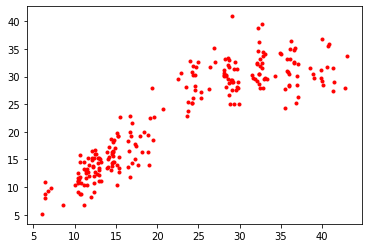

In [142]:
# Training and ridge regression model
# Predicting values
# Calculating mean squared error

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train, y_train)
y_ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)

plt.plot(y_test, y_ridge_pred, 'r.')

ridge_mse

74.61260997572677

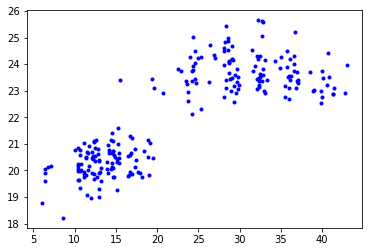

In [157]:
# Training and SGD model
# Predicting values
# Calculating mean squared error

sgd_reg = SGDRegressor(penalty="l2", alpha=10, random_state=42)
sgd_reg.fit(X_train_scaled, y_train.ravel())
y_sgd_pred = sgd_reg.predict(X_test_scaled)
sgd_mse = mean_squared_error(y_test, y_sgd_pred)

plt.plot(y_test, y_sgd_pred, 'b.')

sgd_mse

19.97700888709938

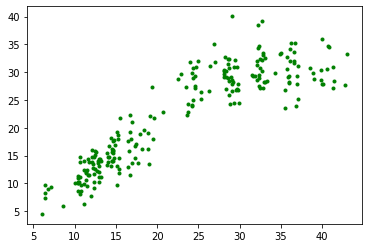

In [158]:
# Training Lasso model
# Predicting values
# Calculating mean squared error

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
y_lasso_pred = lasso_reg.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)

plt.plot(y_test, y_lasso_pred, 'g.')

lasso_mse

23.19037184421654

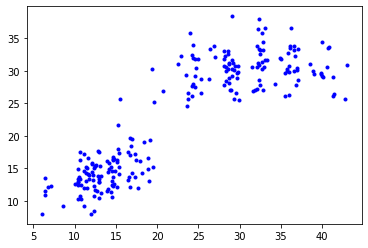

In [128]:
# Elastic net

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)
y_elastic_pred = elastic_net.predict(X_test)
elastic_mse = mean_squared_error(y_test, y_elastic_pred)

plt.plot(y_test, y_elastic_pred, 'b.')

elastic_mse

20.361416374017896

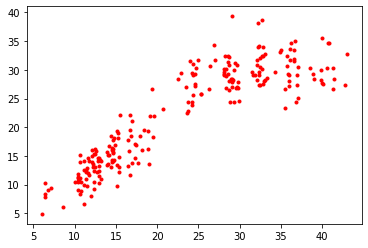

In [159]:
# Elastic net can also be computed iteratively with Stochastic gradient descent
# as seen for Ridge and Lasso above. In this case we use both L1 and L2 penalties 
# as discussed in lecture, which is set by  the parameter penalty="elasticnet" in the command below. 
# In additon we specify the strengh of rgularisation alpha=0.1, and 
# the l1_ratio=0.5 (hyperparametr r in the lecture slides)
# that controls the mixture of Lasso and Ridge as explained in the lecture.
# l1_ratio=0.5 means we have 50% of Lasso and remaining 50% of Ridge. 

sgd_reg = SGDRegressor(penalty="elasticnet", alpha=0.1, l1_ratio=0.5, random_state=42)
sgd_reg.fit(X_train_scaled, y_train.ravel())
y_sgd_elastic_pred = sgd_reg.predict(X_test_scaled)
sgd_elastic_mse = mean_squared_error(y_test, y_sgd_elastic_pred)

plt.plot(y_test, y_sgd_elastic_pred, 'r.')

sgd_elastic_mse



19.923713292068467

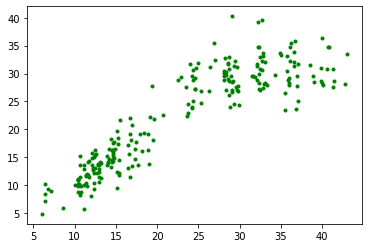

In [161]:
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, 
                       max_iter=1000, early_stopping=True, validation_fraction=0.3, 
                       n_iter_no_change=5, tol=1e-3, random_state=42)

sgd_reg.fit(X_train_scaled, y_train.ravel())
y_sgd_max_iter_pred = sgd_reg.predict(X_test_scaled)
sgd_max_iter_mse = mean_squared_error(y_test, y_sgd_max_iter_pred)


plt.plot(y_test, y_sgd_max_iter_pred, 'g.')

sgd_max_iter_mse